In [2]:
import os
import shutil
import random

# Define the paths and split ratios
dataset_path = r"/Users/alishtuladhar/Number/cnn/embdata/dataset"  # Original dataset path
output_path = r"/Users/alishtuladhar/Number/cnn/embdata/data_split"  # Path to save split dataset
train_ratio = 0.8
val_ratio = 0.2

# Create output directories
for split in ['train', 'val']:
    split_path = os.path.join(output_path, split)
    os.makedirs(split_path, exist_ok=True)

# Loop through each class folder and split images
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        random.shuffle(images)

        # Calculate split index
        train_end = int(len(images) * train_ratio)

        # Define split directories for the current class
        train_dir = os.path.join(output_path, 'train', class_name)
        val_dir = os.path.join(output_path, 'val', class_name)
        os.makedirs(train_dir, exist_ok=True)
        os.makedirs(val_dir, exist_ok=True)

        # Move images to respective directories
        for i, img in enumerate(images):
            img_path = os.path.join(class_path, img)
            if i < train_end:
                shutil.copy(img_path, os.path.join(train_dir, img))
            else:
                shutil.copy(img_path, os.path.join(val_dir, img))

print("Dataset split into train and val folders.")


Dataset split into train and val folders.


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import os  # Add this line to import the os module

# Parameters
batch_size = 32
img_height = 32
img_width = 32
data_path = r"/Users/alishtuladhar/Number/cnn/embdata/data_split"

# Load datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(data_path, "train"),
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(data_path, "val"),
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(data_path, "test"),
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Print class names to verify
class_names = train_ds.class_names
print("Classes:", class_names)


Found 19822 files belonging to 36 classes.
Found 7472 files belonging to 36 classes.
Found 1008 files belonging to 36 classes.
Classes: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


34
35
33
9
35
3
29
7
35


2025-01-22 17:29:01.131510: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


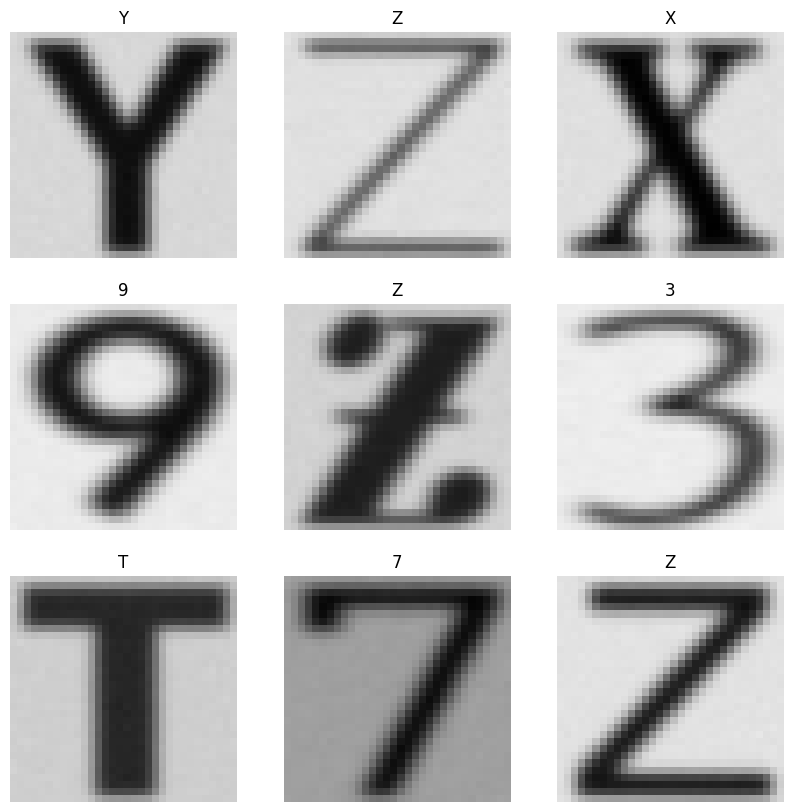

In [4]:
import matplotlib.pyplot as plt

# Display a sample batch of images with labels
for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Display 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        print(labels[i].numpy())  # Print numeric label for each image
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


In [5]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [6]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [7]:
num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  # Normalize images
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)  # Output layer for classification
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()


/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,428 (622.77 KB)

 Trainable params: 159,428 (622.77 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
epochs = 20  # Set your desired number of epochs
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.5901 - loss: 1.5792 - val_accuracy: 0.9244 - val_loss: 0.2936
Epoch 2/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9490 - loss: 0.1799 - val_accuracy: 0.9386 - val_loss: 0.2119
Epoch 3/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9582 - loss: 0.1286 - val_accuracy: 0.9575 - val_loss: 0.1565
Epoch 4/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9679 - loss: 0.0964 - val_accuracy: 0.9546 - val_loss: 0.1636
Epoch 5/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9700 - loss: 0.0830 - val_accuracy: 0.9594 - val_loss: 0.1594
Epoch 6/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9763 - loss: 0.0630 - val_accuracy: 0.9541 - val_loss: 0.1663
Epoch 7/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9797 - loss: 0.0541 - val_accuracy: 0.9611 - val_loss: 0.1481
Epoch 8/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9830 - loss: 0.0421 - val_accuracy:

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


NameError: name 'history' is not defined

In [22]:
import numpy as np

# Replace with your own image path
img_path = r"C:\Users\Acer nitro 5\Number\dataset\nepali_split\३_298.jpg"
img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

# Predict
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 45ms/step
This image most likely belongs to 3 with a 96.18 percent confidence.


In [12]:
model.save(r"C:\Users\Acer nitro 5\number\cnn\emb_model.h5")


In [13]:
model.save(r"C:\Users\Acer nitro 5\number\cnn\emb_model1.keras")


In [16]:
import numpy as np
import tensorflow as tf  # Import TensorFlow

# Load the model
model_path = r"C:\Users\Acer nitro 5\Number\embossed\emb_model"
model = tf.keras.models.load_model(model_path)

# Define image height and width as per the model's expected input size
img_height, img_width = 32, 32  # Change to 32 for your model

# Replace with your own image path
img_path = r"C:\Users\Acer nitro 5\Number\dataset\cropped\segment\emb7.png"

# Load and preprocess the image
img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

# Make predictions
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Define your class names
class_names = [
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
    'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'
]
# Print the most likely class and confidence
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 108ms/step
This image most likely belongs to 3 with a 99.97 percent confidence.


In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np

# Define the classes
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
           'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 
           'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 
           'U', 'V', 'W', 'X', 'Y', 'Z']

# Example true and predicted labels
y_true = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
           'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 
           'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 
           'U', 'V', 'W', 'X', 'Y', 'Z'] # Replace with actual true labels
y_pred = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
           'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 
           'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 
           'U', 'V', 'W', 'X', 'Y', 'Z']  # Replace with model's predictions

# Generate the classification report
report = classification_report(y_true, y_pred, labels=classes, digits=2, output_dict=True)

# Print the overall accuracy
print("Overall Accuracy:", report['accuracy'])

# Convert the classification report to a DataFrame for better visualization
report_df = pd.DataFrame(report).transpose()
print("\nClassification Report:")
print(report_df)

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred, labels=classes)

print("\nConfusion Matrix:")
print(conf_matrix)

# Optionally, convert confusion matrix into a DataFrame for better readability
conf_matrix_df = pd.DataFrame(conf_matrix, index=classes, columns=classes)
print("\nConfusion Matrix (as DataFrame):")
print(conf_matrix_df)

Overall Accuracy: 1.0

Classification Report:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0      1.0
1                   1.0     1.0       1.0      1.0
2                   1.0     1.0       1.0      1.0
3                   1.0     1.0       1.0      1.0
4                   1.0     1.0       1.0      1.0
5                   1.0     1.0       1.0      1.0
6                   1.0     1.0       1.0      1.0
7                   1.0     1.0       1.0      1.0
8                   1.0     1.0       1.0      1.0
9                   1.0     1.0       1.0      1.0
A                   1.0     1.0       1.0      1.0
B                   1.0     1.0       1.0      1.0
C                   1.0     1.0       1.0      1.0
D                   1.0     1.0       1.0      1.0
E                   1.0     1.0       1.0      1.0
F                   1.0     1.0       1.0      1.0
G                   1.0     1.0       1.0      1.0
H                   1.0     1.0     

/Users/alishtuladhar/Number/cnn/embdata/data_split/test

Found 1008 files belonging to 36 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━

2025-01-22 17:34:31.265720: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


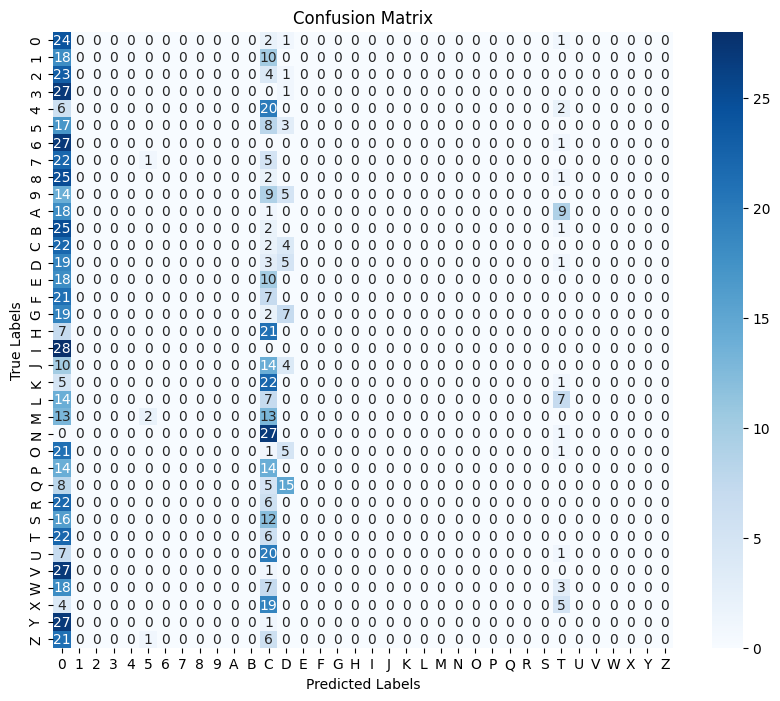

Classification Report:

              precision    recall  f1-score   support

           0       0.04      0.86      0.07        28
           1       0.00      0.00      0.00        28
           2       0.00      0.00      0.00        28
           3       0.00      0.00      0.00        28
           4       0.00      0.00      0.00        28
           5       0.00      0.00      0.00        28
           6       0.00      0.00      0.00        28
           7       0.00      0.00      0.00        28
           8       0.00      0.00      0.00        28
           9       0.00      0.00      0.00        28
           A       0.00      0.00      0.00        28
           B       0.00      0.00      0.00        28
           C       0.01      0.07      0.01        28
           D       0.10      0.18      0.13        28
           E       0.00      0.00      0.00        28
           F       0.00      0.00      0.00        28
           G       0.00      0.00      0.00        28
   

/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Test dataset path
test_path = r"/Users/alishtuladhar/Number/cnn/embdata/data_split/test"

# Load the test dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Get true labels and predictions
true_labels = []
predicted_labels = []

for images, labels in test_ds:
    predictions = model.predict(images)
    true_labels.extend(labels.numpy())  # True labels
    predicted_labels.extend(np.argmax(predictions, axis=1))  # Predicted labels

# Convert to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:\n")
print(report)